In [1]:
import numpy as np
import plotly.graph_objects as go

### Plotly Basics

Explaining data object

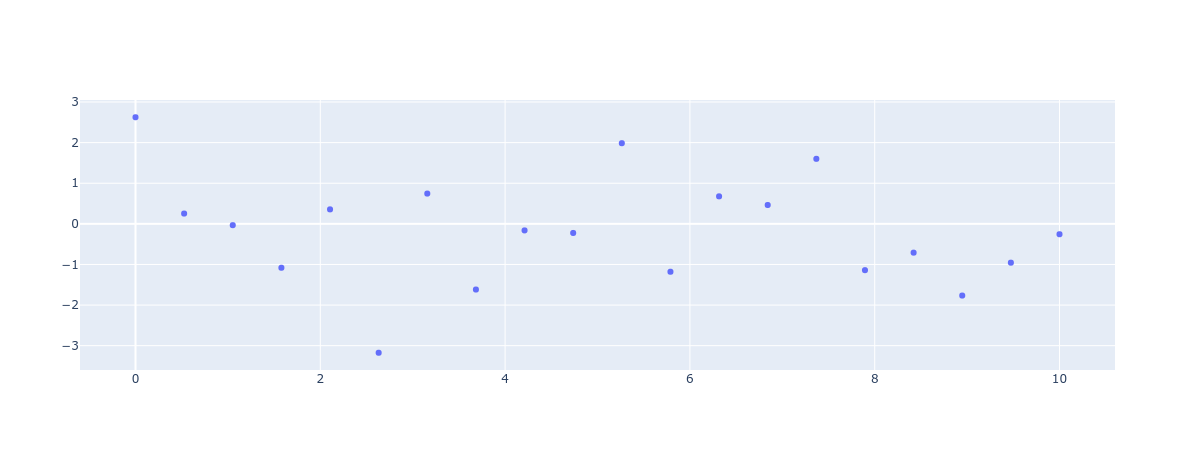

In [4]:
# Create some noisy data
np.random.seed(1)
N = 20
x = np.linspace(0, 10, N)
y1 = np.random.randn(N) + np.cos(x)

#  Create the data object
trace1 = go.Scatter(x = x, y=y1,
                    mode = 'markers',
                    name = 'trace1')

# Create the figure object
fig = go.Figure(data=trace1)
fig.show()

Using the documentation, updating traces and the magic underscore notation

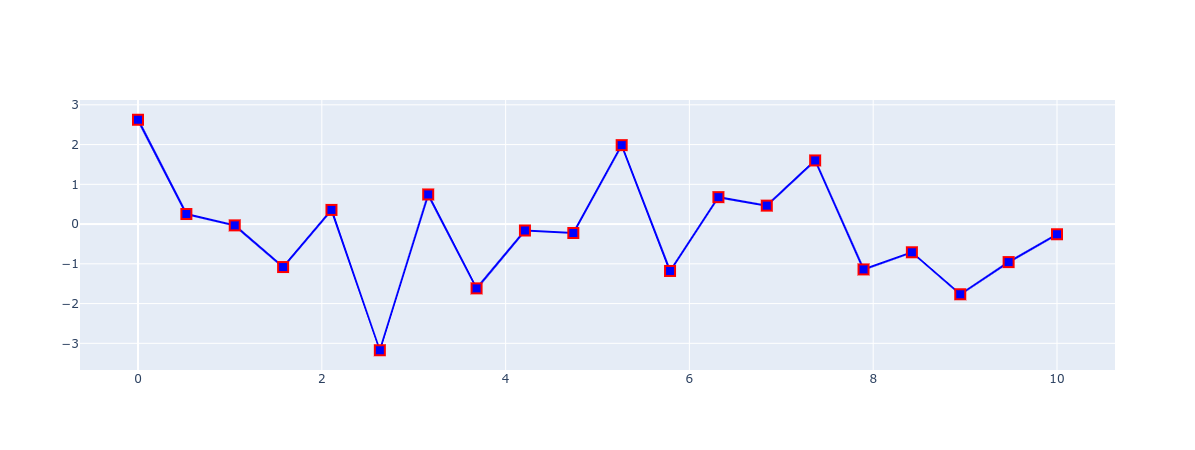

In [6]:
# trace_settings = {
#     'mode' : 'lines+markers',
#     'marker': {
#         'color' : 'blue',
#         'symbol' : 'square',
#         'size' : 10,
#         'line' : {
#             'color' : 'red',
#             'width' : 2
#         }
#     }
# }

#fig.update_traces(trace_settings)
fig.update_traces(mode = 'lines+markers', 
                  marker_color = 'blue',
                  marker_symbol = 'square',
                  marker_size = 10,
                  marker_line_color = 'red',
                  marker_line_width = 2 
                 )

# Can also edit attributes directly
#fig.data[0].marker.color = 'red'

fig.show()

Lets add another trace

In [7]:
y2 = np.random.randn(N) + np.sin(x) + 2
trace2 = go.Scatter(trace_settings,x = x,y = y2, 
                    marker_color = 'red',
                    name = 'trace2'
                   )

fig.add_trace(trace2)
fig.show()

NameError: name 'trace_settings' is not defined

Layout Object

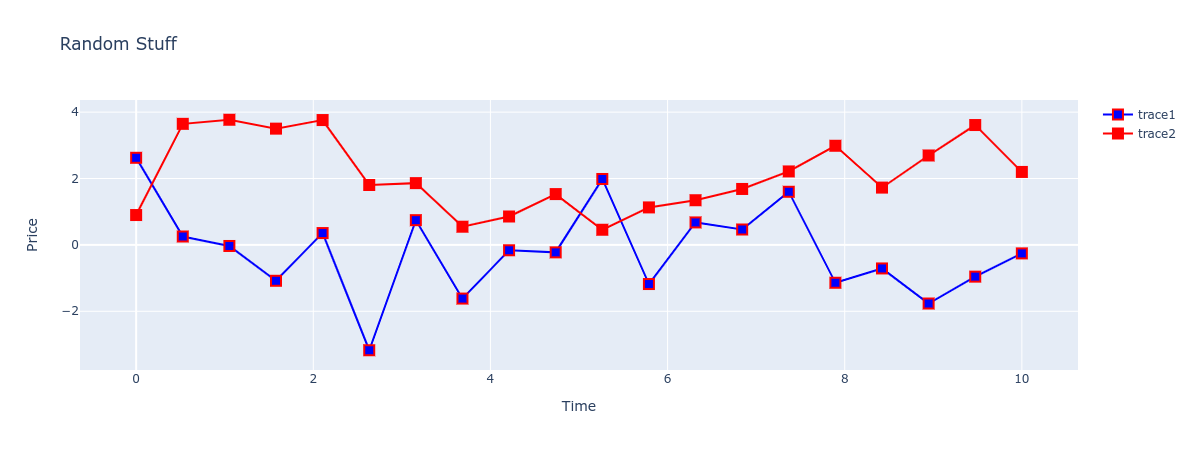

In [6]:
layout_settings = {
    'title' : 'Random Stuff',
    'xaxis' : {
        'title' : 'Time'
    },
    'yaxis' : {
        'title' : 'Price'
    }
}
layout = go.Layout(layout_settings)
fig.update_layout(layout)
fig.show()

If we have all the settings ready beforehand, its quite fast

In [8]:
trace1 = go.Scatter(trace_settings, x=x, y=y1, name = 'trace1')
trace2 = go.Scatter(trace_settings, x=x, y=y2, name = 'trace2', marker_color='red')
data = [trace1,trace2]
fig = go.Figure(data=data, layout=layout)
fig.show()

### Plotly Express: Going even faster

In [9]:
import plotly.express as px
import pandas as pd

In [10]:
df = px.data.iris()
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


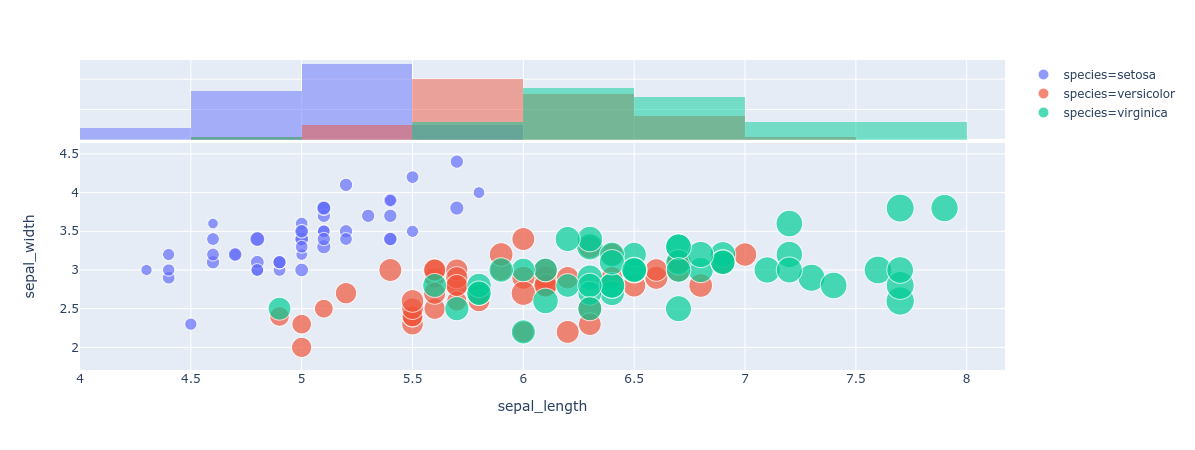

In [11]:
fig = px.scatter(df, x=df.sepal_length, y=df.sepal_width, color=df.species, size=df.petal_length, marginal_x="histogram")
fig.show()

### Now lets have some fun

#### Plotting 3D Fermi Surfaces

In [12]:
from auxilary_func import hexagon_brillouin, Pd_energy
from math import pi,sqrt

In [13]:
# Make a meshgrid to sample FS
grid_number = 20
grid_number = complex(0,grid_number)

C = 17.743
A = 2.830
kx, ky, kz = np.mgrid[-pi/A:pi/A:grid_number, -pi/A:pi/A:grid_number, -pi/C:pi/C:grid_number]
energies = Pd_energy(kx,ky,kz)

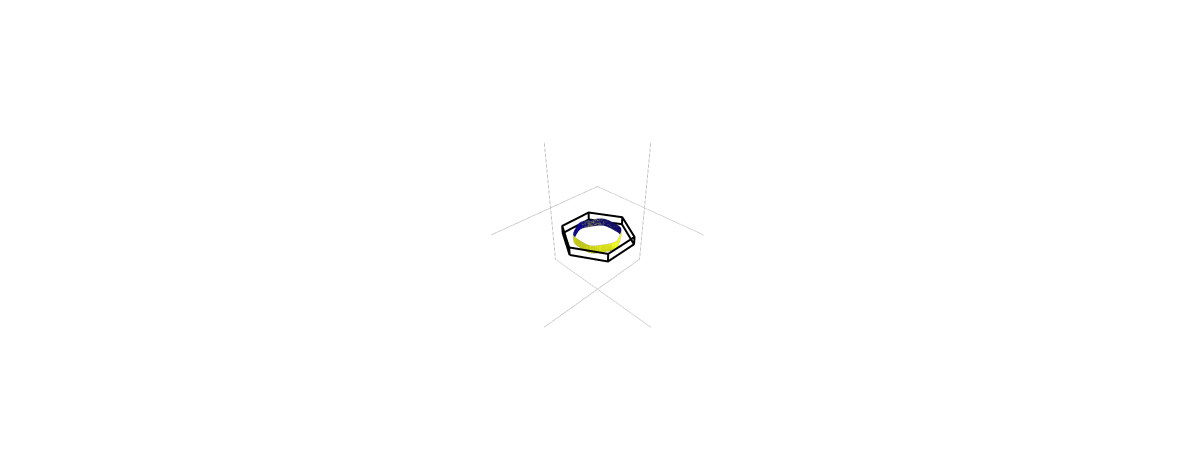

In [24]:
# Create the isosurface object
isosurface = go.Isosurface(x=kx.flatten(),
                           y=ky.flatten(),
                           z=kz.flatten(),
                           value=energies.flatten(),
                           isomin=0.219,
                           isomax=0.220,
                           showscale = False
                          )


scene_axis_settings =   dict(
                            title = '',
                            range = [-3,3],
                            ticks ='',
                            showbackground = False,
                            showgrid = False,
                            showline = False,
                            showspikes = False,
                            showticklabels = False
                        )
# Create layout object
layout = go.Layout({
    'scene': {
        'xaxis' : scene_axis_settings,
        'yaxis' : scene_axis_settings,
        'zaxis' : scene_axis_settings
    }
})

data = [isosurface,*hexagon_brillouin()]
fig = go.Figure(data=data,layout=layout)
fig.show()

#### Illustrating Buttons via Crystal Lattice Example

In [17]:
from auxilary_func import lattice_generator

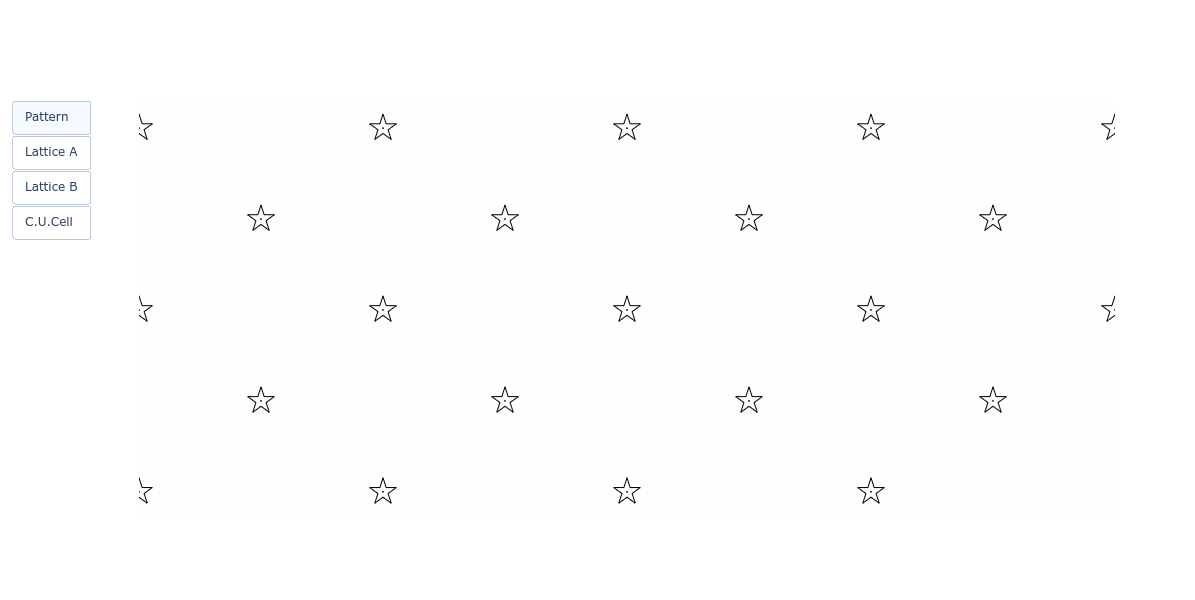

In [22]:
# Define the lattice vectors
a1 = np.array([1,0])
a2 = np.array([0.5,sqrt(3)/2])
# Conventional lattice vector
a2_c = np.array([0,sqrt(3)])


# Make the pattern
x, y = lattice_generator(a1, a2)
pattern = go.Scatter(x = x,
                     y = y,
                     mode = 'markers',
                     name = '',
                     marker = {
                         'color' : 'black',
                         'size' : 20,
                         'symbol' : 'star-open-dot'
                     }
                    )

# Make two lattice options
latticeA = go.Scatter(visible = False, x = x, y = y, mode='markers', marker_color = 'red', marker_size = 10, name = '')
latticeB = go.Scatter(visible = False, x = x+0.5, y = y, mode='markers', marker_color = 'blue', marker_size = 10, name = '')

# Put data into a list
data = [pattern, latticeA, latticeB]

# Make annotation arrow to indicate lattice vectors
def make_arrow(vec, text, color = 'Red', vec_zero = [0,0], text_shift = [-0.2,-0.1]):
    annot = [dict(
            # Arrow 
            x=vec[0]+vec_zero[0],
            y=vec[1]+vec_zero[1],
            ax=vec_zero[0],
            ay=vec_zero[1],
            xref='x',
            yref='y',
            axref='x',
            ayref = 'y',
            showarrow = True,
            arrowhead = 2,
            arrowsize = 1,
            arrowwidth = 3, 
            arrowcolor = color
                 ),
            dict(
            #text
            x=(vec[0]+vec_zero[0])/2+text_shift[0],
            y=(vec[1]+vec_zero[1])/2+text_shift[1],
            xref='x',
            ayref = 'y',
            text = text,
            font = dict(
                color = color,
                size = 20
            ),
            showarrow=False,
             )
        ]
    return annot


updatemenus = [ 
    dict(
        type="buttons",
        direction="down",
        active=0,
        buttons=list([
            
            dict(label="Pattern",
                 method="update",
                 args=[{"visible": [True, False, False]},
                       {"title": "Pattern",
                        "annotations": []}]),
            
            dict(label="Lattice A",
                 method="update",
                 args=[{"visible": [True, True, False]},
                       {"title": "Lattice A with a Primitive Unit Cell",
                        "annotations": [*make_arrow(a1,'$a_1$'), *make_arrow(a2,'$a_2$', text_shift = [-0.3,-0.1])]}]),
            
            dict(label="Lattice B",
                 method="update",
                 args=[{"visible": [True, False, True]},
                       {"title": "Lattice B with a Primitive Unit Cell",
                        "annotations": [*make_arrow(a1,'$a_1$', vec_zero = [-0.5,0], color = 'Blue'), *make_arrow(a2,'$a_2$',vec_zero = [-0.5,0], color = 'Blue')]}]),
            
            dict(label="C.U.Cell",
                 method="update",
                 args=[{"visible": [True, True, False]},
                       {"title": "Conventional Unit Cell",
                        "annotations": [*make_arrow(a2_c,'$a_2$'), *make_arrow(a1,'$a_1$')]}])
        ])
    )
]

axis_settings = {
    'range' : [-2, 2],
    'visible' : False,
    'showgrid' : False,
    'fixedrange' : True
}

layout = {
    'showlegend' : False,
    'updatemenus' : updatemenus,
    'plot_bgcolor' : 'rgb(254, 254, 254)',
    'width' : 600,
    'height' : 600,
    'xaxis' : axis_settings,
    'yaxis' : axis_settings
}
layout = go.Layout(layout)

fig=go.Figure(data=data, layout=layout)
fig.show()